In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from gnnco import BatchedDenseGraphs, BatchedSignals
from gnnco.chem import smiles_to_graph
from gnnco.models import GAT
from gnnco.random import erdos_renyi
from gnnco.visualisation import plot_similarities
from safetensors.torch import load_model
from sklearn.decomposition import PCA

In [16]:
model = GAT(6, 16, 128, 128)
load_model(
    model,
    "/home/jlagesse/gnnco/mlruns/898442121550368682/fda9fc47431b4266818d7c27c0aaac94/artifacts/checkpoint.safetensors",
)

(set(), [])

In [17]:
g = BatchedDenseGraphs.from_graphs(
    [smiles_to_graph("C1=CC=C2C(=C1)NC(=N2)C3=CSC=N3")]
).to_sparse()
# g = erdos_renyi(1, 20, 0.4).to_sparse()
batch = g
g = g[0]
signal = BatchedSignals(torch.ones((g.order(), 1)), torch.LongTensor([0]))

In [18]:
out = model(signal, batch)._signals

In [19]:
out = out.detach().numpy()

In [20]:
pca = PCA(n_components=2)
pca.fit(out)
print(pca.explained_variance_ratio_)

[0.5686127  0.15134868]


In [21]:
x = pca.transform(out)
x.shape

(14, 2)

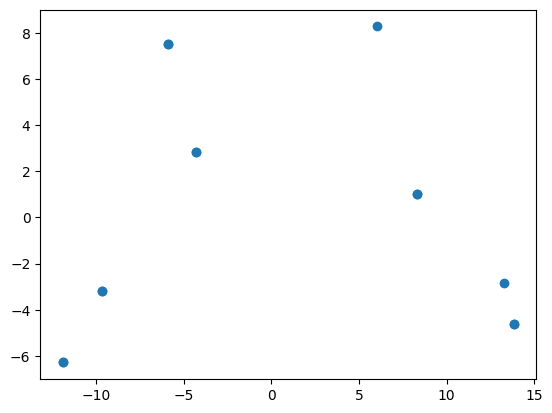

In [22]:
plt.scatter(x[:,0], x[:,1])